In [2]:
import pandas as pd

In [5]:
df2=pd.read_csv("titanic-passengers.csv",sep=";")

In [7]:
df2.shape

(891, 12)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [11]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
print(df2["Cabin"].value_counts())

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
F2             3
              ..
B102           1
B86            1
D10 D12        1
B50            1
D49            1
Name: Cabin, Length: 147, dtype: int64


In [14]:
df2["Cabin"].fillna('G6',inplace=True)

In [15]:
df2["Age"].fillna(df2["Age"].mean(),inplace=True)

In [16]:
target_embarked={"Embarked" :{"S":1,"C":0}}
df2.replace(target_embarked,inplace=True)

In [17]:
from sklearn import preprocessing as sk
encouder = sk.LabelEncoder()
df2["Cabin"]=encouder.fit_transform(df2["Cabin"])

In [18]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,145,1
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,140,1
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,145,1
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,145,1
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,145,0
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,145,0
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,145,1
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,145,1


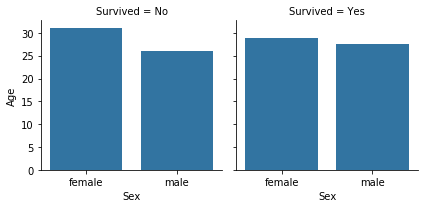

In [20]:
import seaborn as sns
grid= sns.FacetGrid(df2,col='Survived')
grid.map(sns.barplot,"Sex","Age",alpha=1,ci=None)

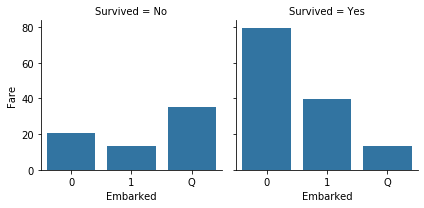

In [21]:
grid= sns.FacetGrid(df2,col='Survived')
grid.map(sns.barplot,"Embarked","Fare",alpha=1,ci=None)

In [23]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

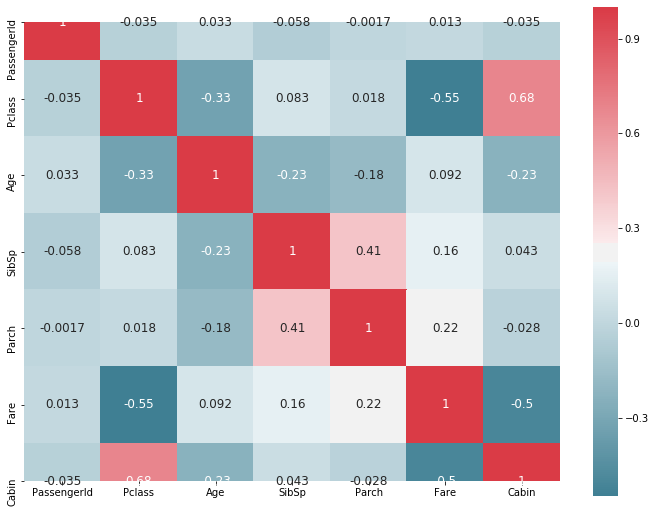

In [25]:
import matplotlib.pyplot as plt
plot_correlation_map( df2 )

## this function Compute pairwise correlation of columns, and the color represente the interval of variation


In [27]:
df2[['Survived','Pclass']].groupby(['Survived'],as_index=True).mean()

,Pclass
Survived,
No,2.531876
Yes,1.950292


In [29]:
data=df2["Name"].str.split(",",n = 1, expand = True) 
data


,0,1
0,Collander,Mr. Erik Gustaf
1,Moen,Mr. Sigurd Hansen
2,Jensen,Mr. Hans Peder
3,Palsson,Mrs. Nils (Alma Cornelia Berglund)
4,Davidson,Mr. Thornton
...,...,...
886,Nasser,Mrs. Nicholas (Adele Achem)
887,Sirayanian,Mr. Orsen
888,Cacic,Miss. Marija
889,Petroff,"Mr. Pastcho (""Pentcho"")"


In [30]:
data=data[1].str.split(".",n = 0, expand = True) 

In [32]:
data[0]

0         Mr
1         Mr
2         Mr
3        Mrs
4         Mr
       ...  
886      Mrs
887       Mr
888     Miss
889       Mr
890     Miss
Name: 0, Length: 891, dtype: object

In [33]:
df2["Name"]=data[0]

In [34]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,Mr,male,28.000000,0,0,248740,13.0000,145,1
1,76,No,3,Mr,male,25.000000,0,0,348123,7.6500,140,1
2,641,No,3,Mr,male,20.000000,0,0,350050,7.8542,145,1
3,568,No,3,Mrs,female,29.000000,0,4,349909,21.0750,145,1
4,672,No,1,Mr,male,31.000000,1,0,F.C. 12750,52.0000,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,Mrs,female,14.000000,1,0,237736,30.0708,145,0
887,61,No,3,Mr,male,22.000000,0,0,2669,7.2292,145,0
888,535,No,3,Miss,female,30.000000,0,0,315084,8.6625,145,1
889,102,No,3,Mr,male,29.699118,0,0,349215,7.8958,145,1


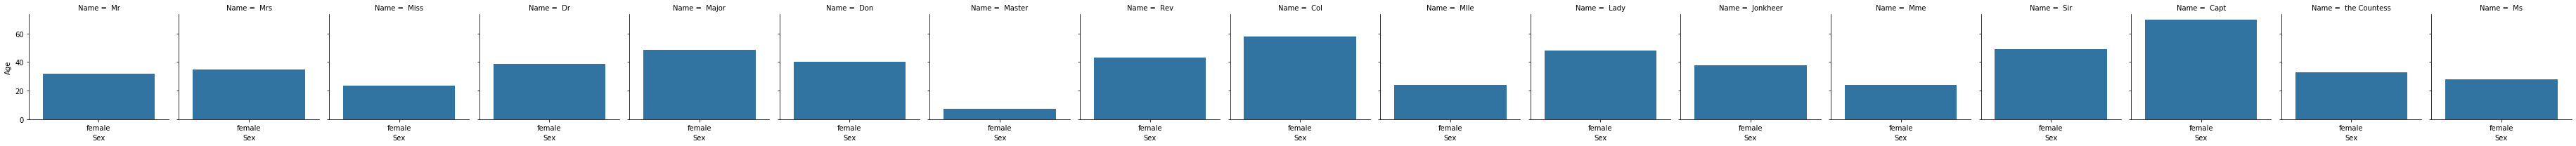

In [36]:
grid= sns.FacetGrid(df2,col='Name')
grid.map(sns.barplot,'Sex','Age',alpha=1,ci=None)

In [49]:
Name = {"Capt":"Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr." :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
df2["Name"]=df2["Name"].str.strip()
df2.replace(Name,inplace=True)

In [50]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,Mr,male,28.000000,0,0,248740,13.0000,145,1
1,76,No,3,Mr,male,25.000000,0,0,348123,7.6500,140,1
2,641,No,3,Mr,male,20.000000,0,0,350050,7.8542,145,1
3,568,No,3,Mrs,female,29.000000,0,4,349909,21.0750,145,1
4,672,No,1,Mr,male,31.000000,1,0,F.C. 12750,52.0000,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,Mrs,female,14.000000,1,0,237736,30.0708,145,0
887,61,No,3,Mr,male,22.000000,0,0,2669,7.2292,145,0
888,535,No,3,Miss,female,30.000000,0,0,315084,8.6625,145,1
889,102,No,3,Mr,male,29.699118,0,0,349215,7.8958,145,1


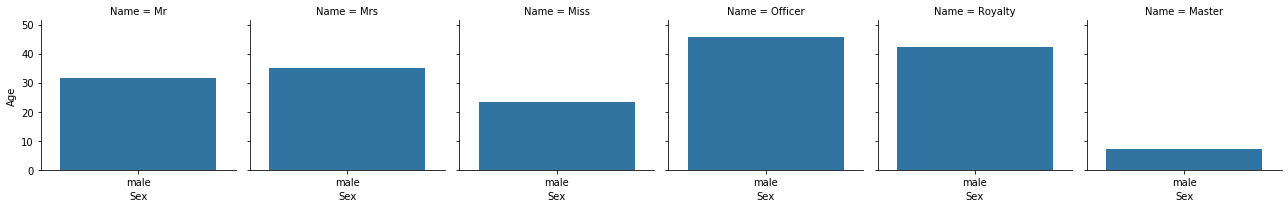

In [51]:
grid= sns.FacetGrid(df2,col='Name')
grid.map(sns.barplot,'Sex','Age',alpha=1,ci=None)

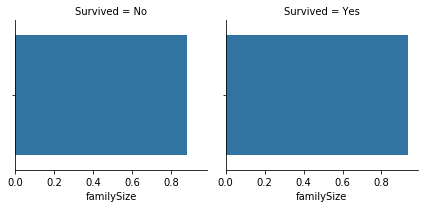

In [52]:
df2["familySize"]=df2["SibSp"]+df2["Parch"]

grid= sns.FacetGrid(df2,col='Survived')
grid.map(sns.barplot,'familySize',alpha=1,ci=None)